<a href="https://colab.research.google.com/github/ashfiya-06/AIML_2303A52366/blob/main/Lab7_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/breast_cancer_survival.csv')
print(df.head())
print(df.describe())
print(df.info())
print("Dataframe shape:", df.shape)
print("Dataframe columns:", df.columns)

   Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0   42  FEMALE   0.95256   2.15000  0.007972 -0.048340           II   
1   54  FEMALE   0.00000   1.38020 -0.498030 -0.507320           II   
2   63  FEMALE  -0.52303   1.76400 -0.370190  0.010815           II   
3   78  FEMALE  -0.87618   0.12943 -0.370380  0.132190            I   
4   42  FEMALE   0.22611   1.74910 -0.543970 -0.390210           II   

                       Histology ER status PR status HER2 status Surgery_type  \
0  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
1  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
2  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   Lumpectomy   
3  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
4  Infiltrating Ductal Carcinoma  Positive  Positive    Positive   Lumpectomy   

  Date_of_Surgery Date_of_Last_Visit Patient_Status  
0       20-May-18          26-Au

In [ ]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64


In [ ]:
y = df['Patient_Status']
x = df.drop(['Date_of_Surgery', 'Date_of_Last_Visit', 'Patient_Status'], axis=1)
print("Features:", x)
print("Target:", y)

Features:      Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II   

                          Histology ER status PR status HER2 status  \
0     Infiltrating Ductal Carcinoma  Posit

In [ ]:
x = x.replace({'Gender': {'MALE': 0, 'FEMALE': 1}})
x = x.replace({'Tumour_Stage': {'I': 1, 'II': 2, 'III': 3}})
x = x.replace({'Histology': {'Infiltrating Ductal Carcinoma': 1, 'Infiltrating Lobular Carcinoma': 2, 'Mucinous Carcinoma': 3}})
x = x.replace({'Surgery_type': {'Other': 1, 'Lumpectomy': 2, 'Modified Radical Mastectomy': 3, 'Simple Mastectomy': 4}})
x = x.replace({'ER status': {'Positive': 1, 'Negative': 0}})
x = x.replace({'PR status': {'Positive': 1, 'Negative': 0}})
x = x.replace({'HER2 status': {'Positive': 1, 'Negative': 0}})
y = y.replace({'Alive': 0, 'Dead': 1})
print(x)
print(y)

     Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0     42       1  0.952560   2.15000  0.007972 -0.048340             2   
1     54       1  0.000000   1.38020 -0.498030 -0.507320             2   
2     63       1 -0.523030   1.76400 -0.370190  0.010815             2   
3     78       1 -0.876180   0.12943 -0.370380  0.132190             1   
4     42       1  0.226110   1.74910 -0.543970 -0.390210             2   
..   ...     ...       ...       ...       ...       ...           ...   
329   59       1  0.024598   1.40050  0.024751  0.280320             2   
330   41       1  0.100120  -0.46547  0.472370 -0.523870             1   
331   54       1  0.753820   1.64250 -0.332850  0.857860             2   
332   74       1  0.972510   1.42680 -0.366570 -0.107820             2   
333   66       1  0.286380   1.39980  0.318830  0.836050             2   

     Histology  ER status  PR status  HER2 status  Surgery_type  
0            1          1          1         

<ipython-input-48-9d2a80879e4d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x = x.replace({'Gender': {'MALE': 0, 'FEMALE': 1}})
<ipython-input-48-9d2a80879e4d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x = x.replace({'Tumour_Stage': {'I': 1, 'II': 2, 'III': 3}})
<ipython-input-48-9d2a80879e4d>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.

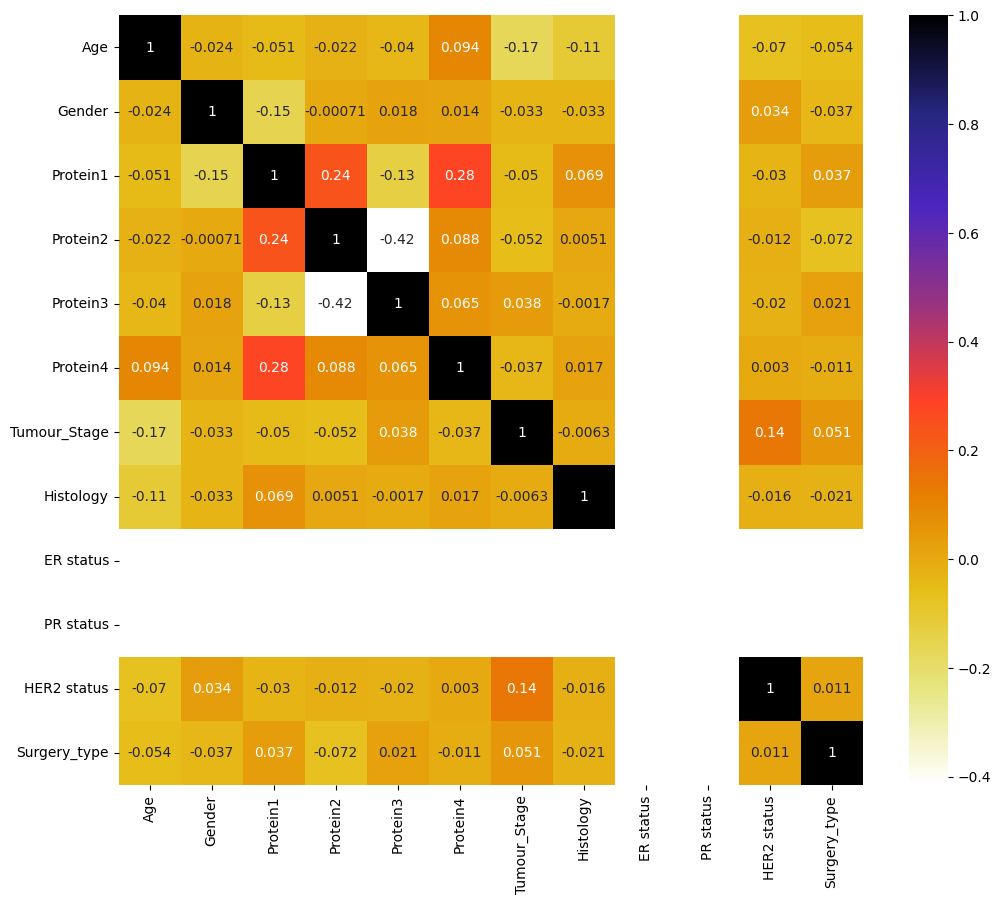

In [ ]:
plt.figure(figsize=(12, 10))
cor = x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

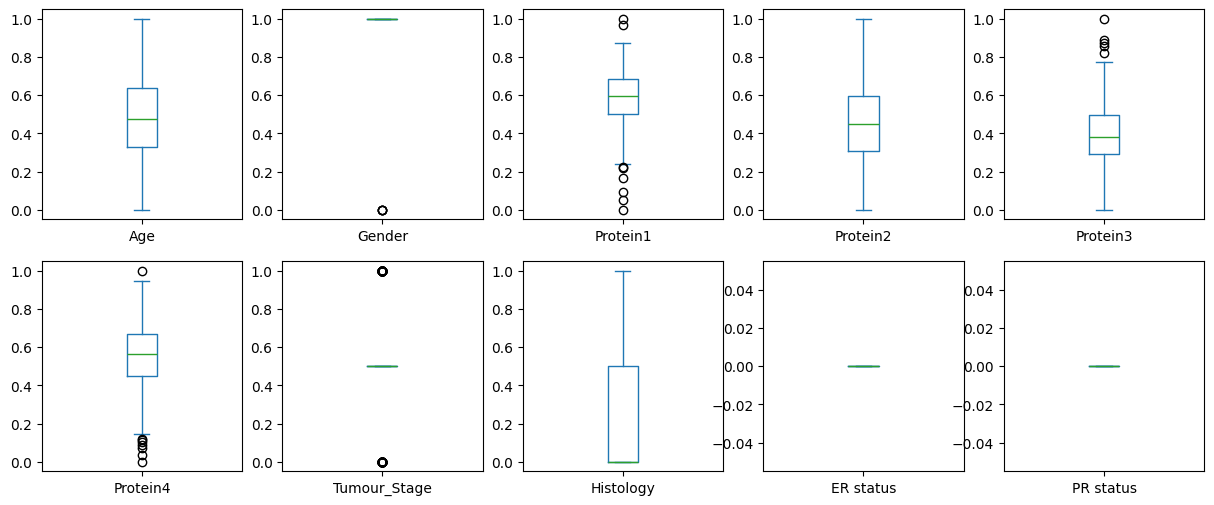

In [ ]:
x.iloc[:, :10].plot(kind='box', subplots=True, layout=(2, 5), sharex=False, sharey=False, figsize=(15, 6))
plt.show()

In [ ]:
x = (x - x.min()) / (x.max() - x.min())
y.fillna(0, inplace=True)
x.fillna(0, inplace=True)

In [ ]:
model = SVC()
test_size = 0.312
x_train, x_test, y_train, y_test = train_test_split(
      x, y, test_size=test_size, random_state=58
        )
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with test size {test_size}: {accuracy}")
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)
classification_rep = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:")
print(classification_rep)

Accuracy with test size 0.312: 0.8380952380952381
Confusion Matrix:
[[88  0]
 [17  0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91        88
         1.0       1.00      0.00      0.00        17

    accuracy                           0.84       105
   macro avg       0.92      0.50      0.46       105
weighted avg       0.86      0.84      0.76       105



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(x_test)
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions, zero_division=1))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.783 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.783 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.783 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.783 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.783 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.783 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.783 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.783 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.783 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf